In [2]:
from dask.distributed import Client

# Setup a local cluster.
# By default this sets up 1 worker per core
client = Client(memory_limit="2 GiB", threads_per_worker=1, n_workers=4)
client.cluster

In [1]:
import glob
import os
from dask.diagnostics import ProgressBar

In [ ]:
import xarray as xr

In [ ]:
files = sorted(glob.glob('HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_*.nc'))

In [ ]:
assert len(files) == 12 * 22

In [10]:
for f in files:
    new_f = f"HiRes_Hourly_Surf_DailyCyle/{os.path.basename(f).replace('_Hourly_', '_DailyCycle_')}"
    try:
        with xr.open_dataset(new_f) as ds:
            ds = ds.isel(hour=0)
    except:
        print(f)
        with xr.open_dataset(f) as ds:
            tph = ds.tp.load().groupby('time.hour').mean(dim='time').load()
            tph.attrs['nhours'] = len(ds.time)
            tph.to_netcdf(new_f)

HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2018_05.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2018_06.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2018_07.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2018_08.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2018_09.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2018_10.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2018_11.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2018_12.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_01.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_02.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_03.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_04.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_05.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_06.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_07.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_08.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_09.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_10.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_11.nc
HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2019_12.nc


In [20]:
allo = dict()
for m in range(1, 12):
    files = sorted(glob.glob(f"HiRes_Hourly_Surf_DailyCyle/ERA5_HiRes_DailyCycle_tp_*_{m:02d}.nc"))
    assert len(files) == 22
    tpm = 0
    for f in files:
        with xr.open_dataset(f) as ds:
            tpm += ds.tp
    tpm /= 22
    allo[f'{m:02d}'] = tpm
    
    # try:
    #    
    #         ds = ds.isel(hour=0)
    # except:
    #     print(f)
    #     with xr.open_dataset(f) as ds:
    #         tph = ds.tp.load().groupby('time.hour').mean(dim='time').load()
    #         tph.attrs['nhours'] = len(ds.time)
    #         tph.to_netcdf(new_f)

In [28]:
for m in range(12, 13):
    files = sorted(glob.glob(f"HiRes_Hourly_Surf_DailyCyle/ERA5_HiRes_DailyCycle_tp_*_{m:02d}.nc"))
    assert len(files) == 22
    tpm = 0
    for f in files:
        with xr.open_dataset(f) as ds:
            tpm += ds.tp
    tpm /= 22
    allo[f'{m:02d}'] = tpm

AssertionError: 

In [30]:
out_ds = allo['01'].to_dataset(name='01')
out_ds

<xarray.Dataset>
Dimensions:    (hour: 24, latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
Data variables:
    01         (hour, latitude, longitude) float32 2.263e-05 ... 4.193e-06

In [31]:
for m in range(2, 13):
    out_ds[f'{m:02d}'] = allo[f'{m:02d}']

In [33]:
out_ds.to_netcdf('HiRes_Hourly_Surf_DailyCyle/ERA5_HiRes_DailyCycle_tp_0000_all.nc')

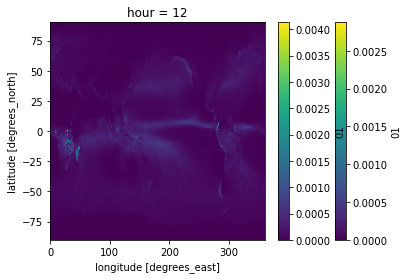

In [36]:
out_ds['01'].isel(hour=0).plot();
out_ds['01'].isel(hour=12).plot();

In [15]:
xr.open_dataset(f)

<xarray.Dataset>
Dimensions:    (hour: 24, latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
Data variables:
    tp         (hour, latitude, longitude) float32 ...

In [19]:
ds.tp.attrs

{'units': 'm', 'long_name': 'Total precipitation'}

In [17]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 744)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2021-12-01 ... 2021-12-31T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 2.407e-06 ... 7.576e-05
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-24 21:58:06 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [ ]:
os.path.basename(f).replace('_Hourly_', '_DailyCycle_')

In [ ]:
ds = xr.open_dataset('HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2021_01.nc')

In [ ]:
tp = ds.tp.load()

In [ ]:
tp = ds.tp.groupby('time.hour').mean(dim='time')

In [ ]:
from dask.diagnostics import ProgressBar

In [ ]:
with ProgressBar():
    out = tp.compute()

In [ ]:
ds.tp.max()

In [ ]:
tp = tp * 1000

In [ ]:
tp.max()

In [ ]:
tp = tp.where(tp > 0.1)

In [ ]:
from xmovie.presets import rotating_globe
from xmovie import Movie
import matplotlib.pyplot as plt

In [ ]:
from myrot import my_rotating_globe

In [ ]:
tp.name = 'Hourly precipitation (mm)'

In [ ]:
mov = Movie(tp, plotfunc=my_rotating_globe, input_check=False, cmap='Blues', vmin=0, vmax=15, extend='max', lon_rotations=1.)

In [ ]:
mov.preview(10)
plt.savefig("movie_preview.png")

In [ ]:
mov.save('movie_rotating_alldays.gif', remove_movie=False, progress=True, framerate=10, gif_framerate=10, overwrite_existing=True)

In [ ]:
mov.save?